In [1]:
import pandas as pd
from glob import glob

In [3]:
#1. Untuk memudahkan analisis, maka lakukan merge ke-12 file tersebut ke dalam 1 file bernama dataPenjualanSetahun.csv. 
data_files = sorted(glob('Sales*.csv'))

mergeddata = pd.DataFrame()

for datafile in data_files:
    df = pd.read_csv(datafile).assign(sourcefilename = datafile)
    mergeddata = pd.concat([mergeddata, df])

mergeddata.to_csv('dataPenjualanSetahun.csv', index=False)

In [4]:
mergeddata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Sales_01_January_2019.csv
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Sales_01_January_2019.csv
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Sales_01_January_2019.csv
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Sales_01_January_2019.csv
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Sales_01_January_2019.csv
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Sales_12_December_2019.csv
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Sales_12_December_2019.csv
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Sales_12_December_2019.csv
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Sales_12_December_2019.csv


In [8]:
# Hapus data yang mengandung nilai Nan
mergeddata.dropna(inplace = True)
mergeddata.reset_index(inplace = True, drop= True)
print(mergeddata.dtypes)


Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
sourcefilename       object
Month                object
dtype: object


In [9]:
#3.Konversikan data sesuai tipenya; misal: Quantity dan Harga adalah tipe numerik. Tentu saja sebelum mengonversi, harus dilihat dulu tipe data masing-masing kolom nya.
mergeddata[['Quantity Ordered', ]] = mergeddata[['Quantity Ordered']].apply(pd.to_numeric, errors='coerce')
mergeddata[['Price Each']] = mergeddata[['Price Each']].apply(pd.to_numeric, errors='coerce')
mergeddata[['Order ID']] = mergeddata[['Order ID']].apply(pd.to_numeric, errors='coerce')

In [10]:
#4.Tambahkan satu kolom bernama "Month" yg bertipe numerik dari kolom "Order Date"
# Kolom ini akan berisi tipe data numerik dari bulan dalam kolom 'Order Date'
# Menggunakan string untuk mendapatkan dua karakter pertama dari setiap tanggal dalam 'Order Date',
mergeddata['Month'] = mergeddata['Order Date'].str[0:2]

# Konversi tipe data kolom 'Month' menjadi int32 untuk mempermudah membaca data bulan sebagai angka, bukan sebagai string,
mergeddata['Month'] = mergeddata['Month'].astype('int32')

# Mencetak tipe data semua kolom dalam DataFrame untuk menampilkan bahwa konversi tipe data telah berhasil
print(mergeddata.dtypes)


Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
sourcefilename       object
Month                 int32
dtype: object


In [63]:
# 5. Tambahkan satu kolom lagi "City" untuk pemrosesan lebih lanjut
# fungsi get_city yang menerima alamat sebagai argumen
# Fungsi get_city membagi string alamat berdasarkan koma (,) dan mengambil bagian kedua (indeks 1),
# membersihkan spasi ekstra di awal dan akhir string menggunakan strip()
def get_city(address):
    return address.split(",")[1].strip(" ")

# Definisikan fungsi get_state yang menerima alamat sebagai argumen
# Fungsi ini membagi string alamat berdasarkan koma (,)
# Kemudian, membagi hasil tersebut lagi berdasarkan spasi (" ") dan mengambil bagian kedua (indeks 1),
# yang memberikan nama negara bagian
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# fungsi get_city dan get_state pada kolom 'Purchase Address' dari DataFrame 'mergeddata'
# Hasilnya digabungkan menjadi satu string yang mencakup kota dan negara bagian,
# ditambahkan ke kolom baru 'City' dalam DataFrame
mergeddata['City'] = mergeddata['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

# Cetak tipe data dalam DataFrame untuk menampilkan bahwa proses telah berhasil
print(mergeddata.dtypes)


Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
sourcefilename       object
Month                 int32
City                 object
dtype: object


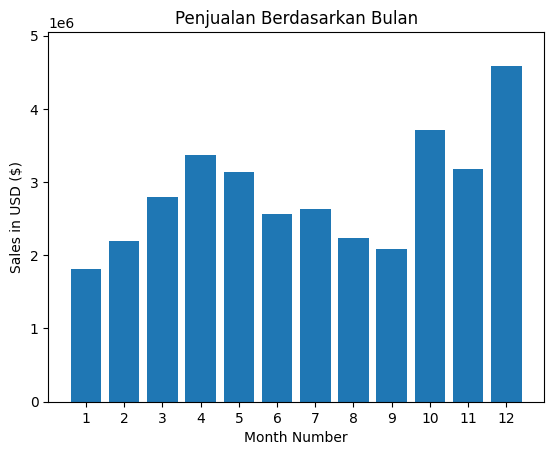

In [14]:
#6.Visualisasikan data penjualan berdasarkan bulan dengan bar plot.
import matplotlib.pyplot as plt

monthly_sales = mergeddata.groupby('Month')['Price Each'].sum()

plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.title('Penjualan Berdasarkan Bulan')
plt.xticks(range(1, 13))
plt.ylim(0, max(monthly_sales.values)*1.1) 
plt.show()

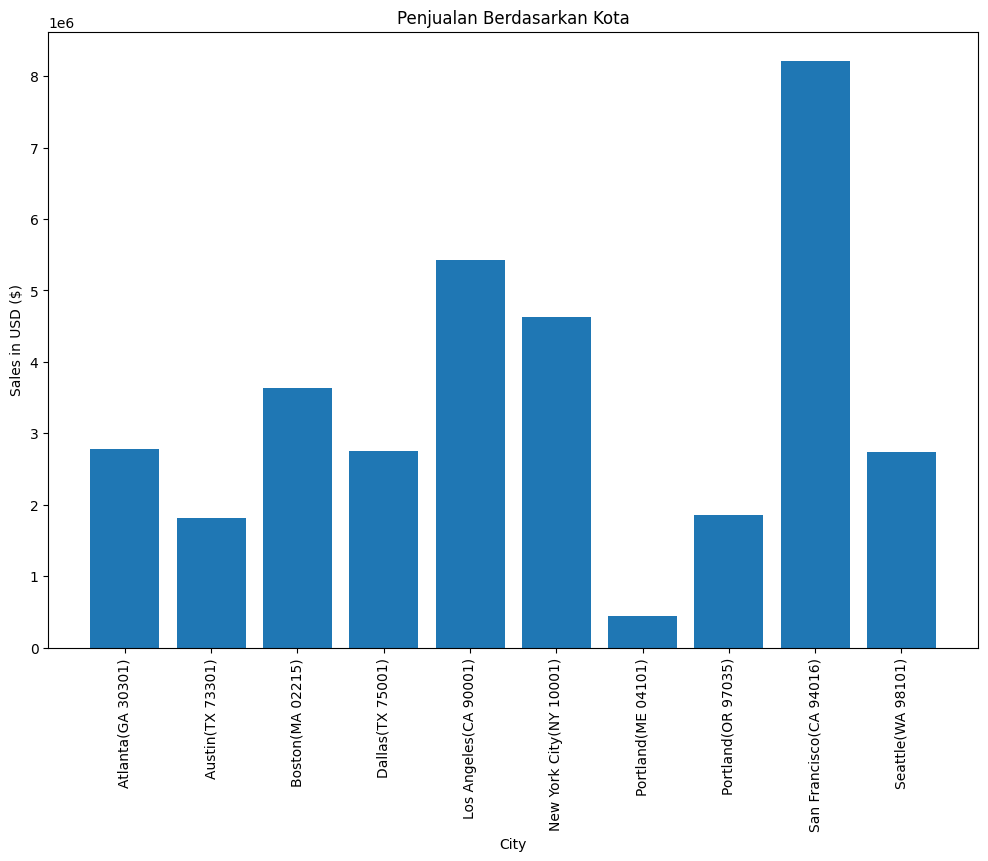

In [21]:
#7. Visualisasi data penjualan berdasarkan kota dengan bar plot.
import matplotlib.pyplot as plt

def get_city(address):
    city = address.split(",")[1].strip(" ")
    state = address.split(",")[2].strip(" ")
    return f"{city}({state})"

mergeddata['City'] = mergeddata['Purchase Address'].apply(lambda x: f"{get_city(x)}")

city_sales = mergeddata.groupby('City')['Price Each'].sum().reset_index()

plt.figure(figsize=(12,8))
plt.bar(city_sales['City'], city_sales['Price Each'])
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.title('Penjualan Berdasarkan Kota')
plt.xticks(rotation=90)
plt.show()

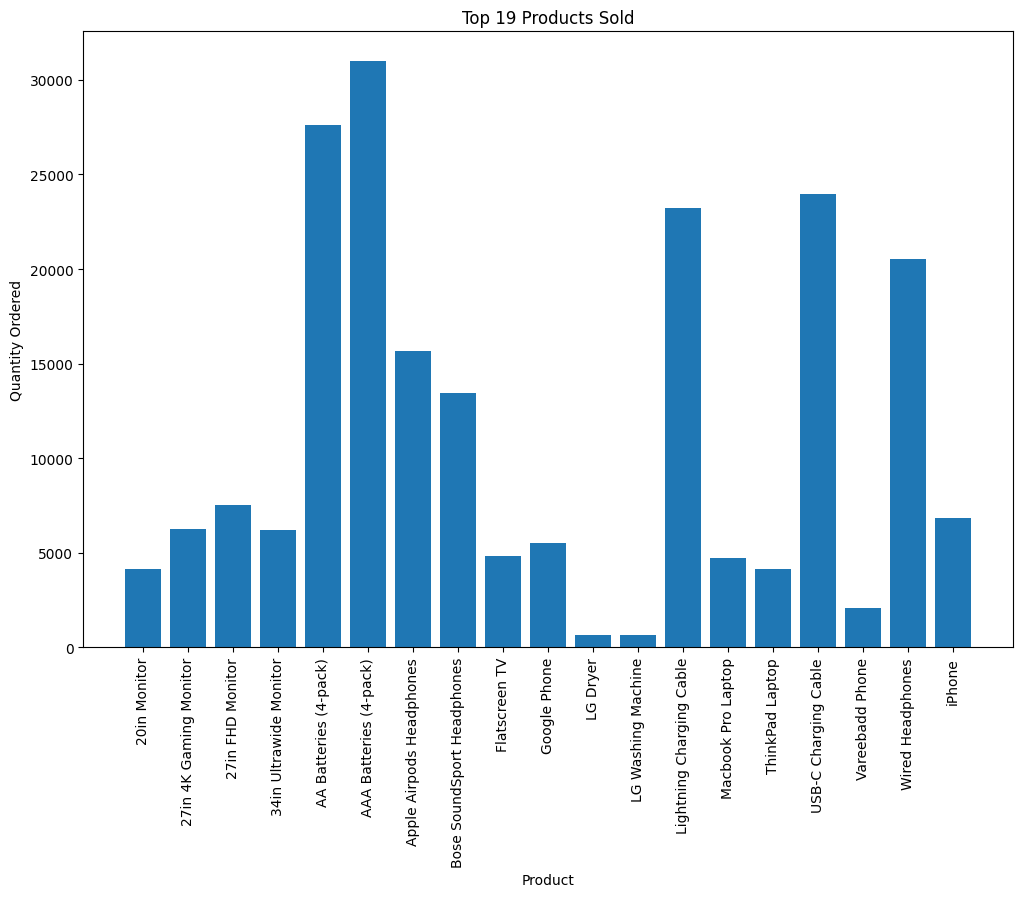

In [57]:
#8. Visualisasi produk yang paling laris terjual dengan cara menjumlahkan data "Quantity Ordered" yang kemudian dikelompokkan berdasarkan nama produknya.
import matplotlib.pyplot as plt

top_products = mergeddata.groupby('Product')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(12,8))
plt.bar(top_products['Product'], top_products['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.title('Top 19 Products Sold')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10352\1752991470.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_products['Product'], rotation='vertical', size=8)


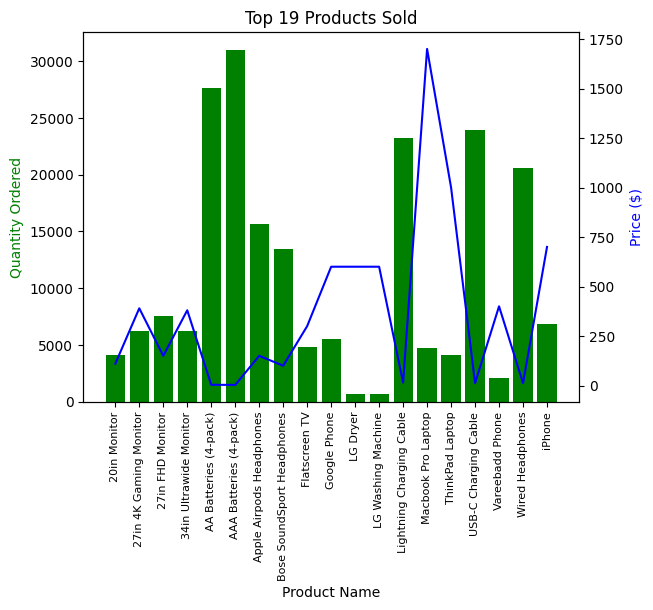

In [62]:
#9. Overlaying-chart bisa menjadi solusi untuk produk yang paling laris terjual. Overlaying-chart dapat diterapkan dengan memadukan barplot dengan lineplot. Barplot untuk melihat jumlah "Quantity Ordered" berdasarkan produk, sedangkan lineplot untuk melihat rata-rata harga setiap penjualan berdasarkan produk. 
import matplotlib.pyplot as plt

top_products = mergeddata.groupby('Product')['Quantity Ordered'].sum().reset_index()
prices = mergeddata.groupby('Product')['Price Each'].mean().reset_index()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(top_products['Product'], top_products['Quantity Ordered'], color='g')
ax2.plot(top_products['Product'], prices['Price Each'], color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(top_products['Product'], rotation='vertical', size=8)

plt.title('Top 19 Products Sold')
plt.show()